In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import and plot data
`cycles.csv` labels the cycle in which each data point belongs.

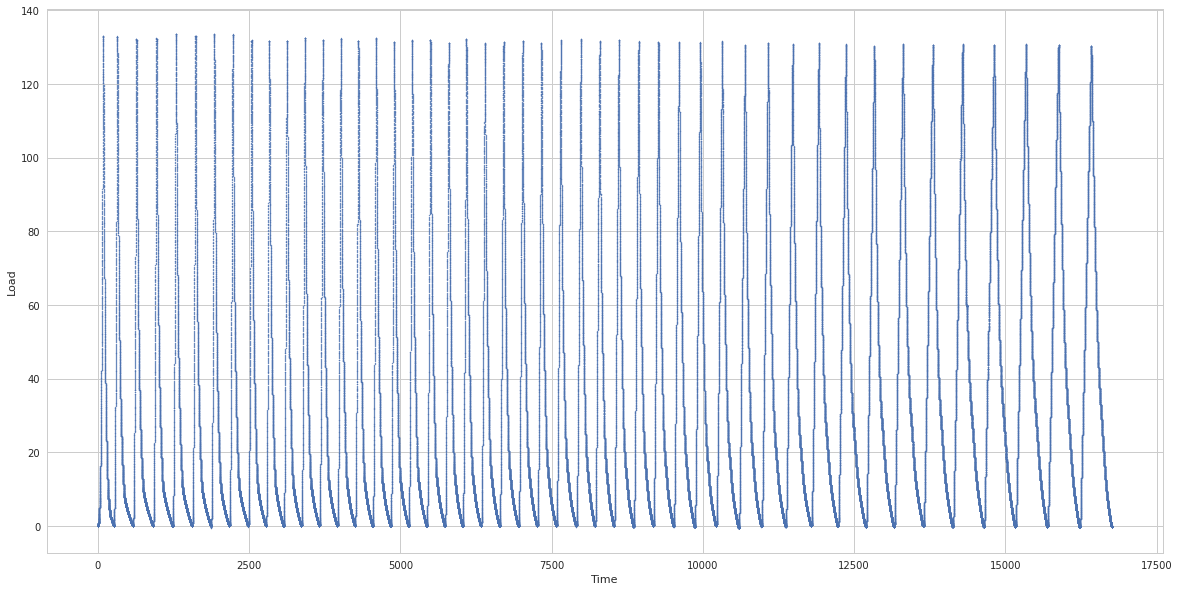

In [9]:
df = pd.read_csv('data/cycles.csv')
fig, axes = plt.subplots(figsize=(20,10))
sns.set()
sns.set_style('whitegrid')
sns.regplot('Time', 'Load', df, fit_reg=False, scatter_kws={'s': 2});

### Extrema behavior over time
Plots of minimum and maximum force (N) over all cycles.

In [64]:
from scipy.signal import argrelextrema
import statsmodels
pd.options.mode.chained_assignment = None  # ignore SettingWithCopyWarning

In [4]:
# TODO clean this up
minima_ind = argrelextrema(df['Load'].values, comparator=np.less, order=100)[0]
maxima_ind = argrelextrema(df['Load'].values, comparator=np.greater, order=100)[0]
time = pd.DataFrame(df['Time'].values[minima_ind]); time.columns = ['Time']
minima = pd.DataFrame(df['Load'].values[minima_ind]); minima.columns = ['MinLoad']; minima = time.join(minima)
maxima = pd.DataFrame(df['Load'].values[maxima_ind]); maxima.columns = ['MaxLoad']; maxima = time.join(maxima)

We choose robust OLS to ignore the maxima outlier at `Time=~1500`.

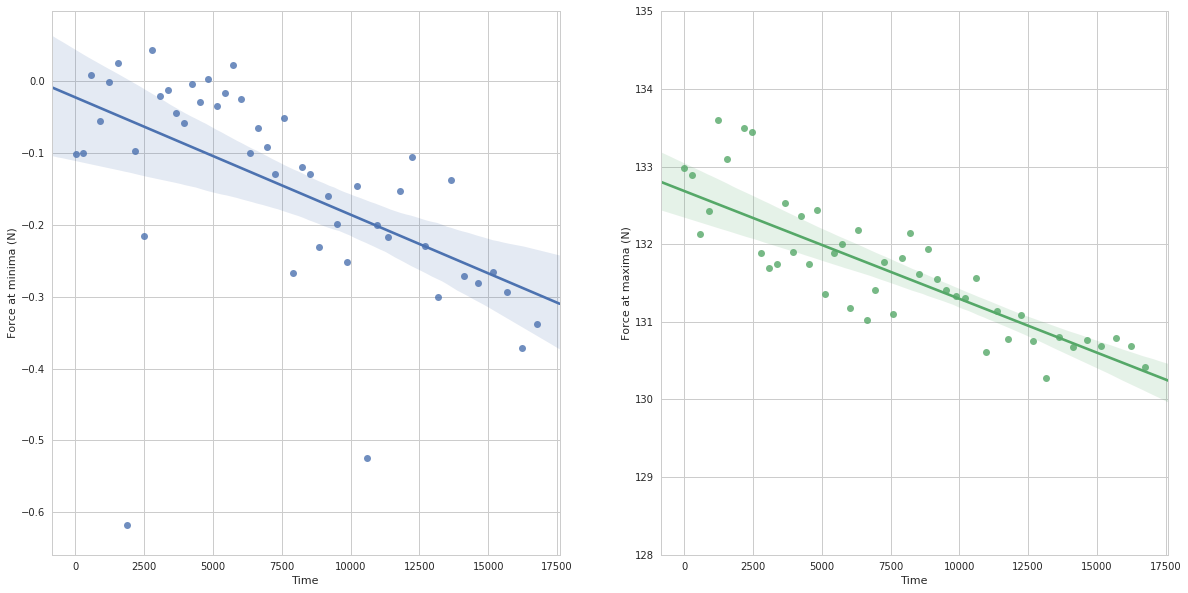

In [12]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,10))
sns.regplot('Time', 'MinLoad', minima, ax=axes.flat[0]); axes[0].set(ylabel='Force at minima (N)')
axes.flat[1].set_ylim(128, 135)
sns.regplot('Time', 'MaxLoad', maxima, robust=True, ax=axes.flat[1]); axes[1].set(ylabel='Force at maxima (N)');

### Cycles overlaid over time

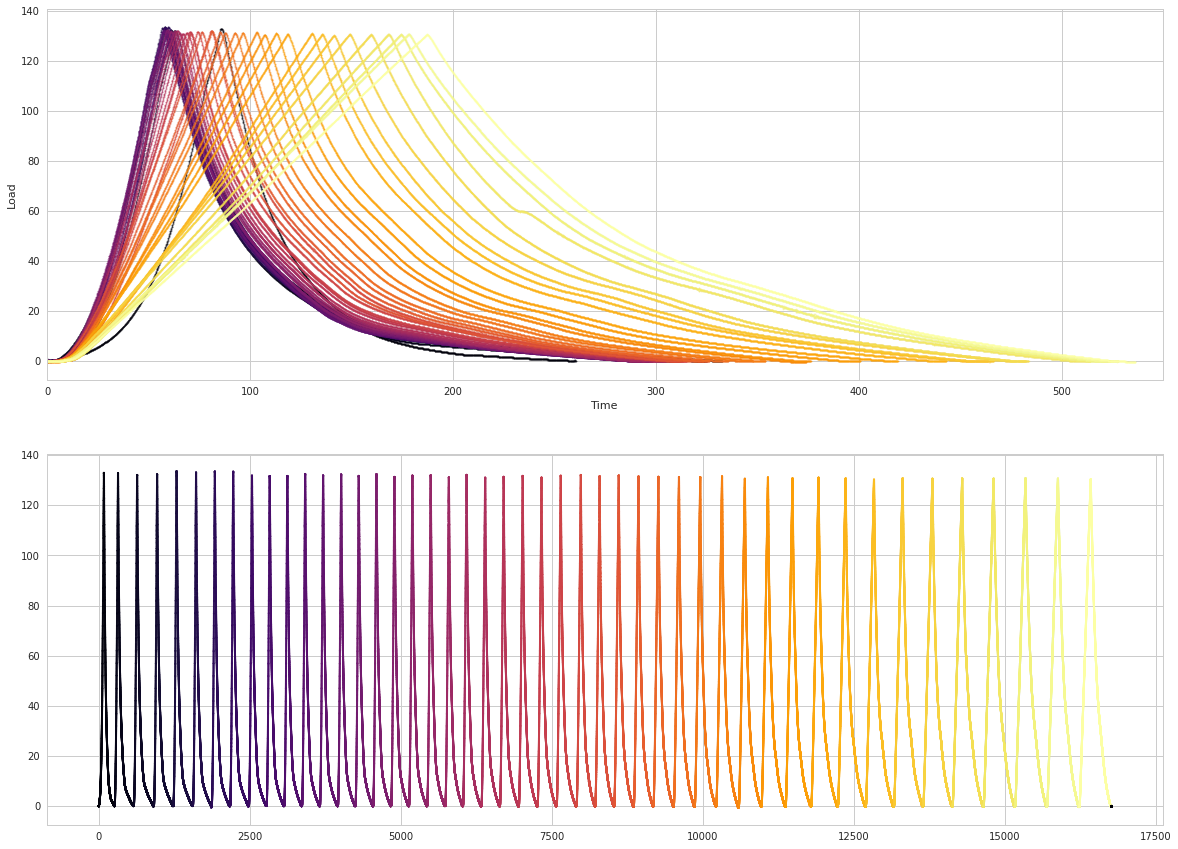

In [119]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(20,15)); axes.flat[0].set_xlim(0, 550)
cmap = plt.get_cmap('inferno') #axes.set_color_cycle(['red', 'black', 'yellow'])
colors = [cmap(i) for i in np.linspace(0, 1, df.Cycle.max())]
for cycle in range(df.Cycle.max()):
    zeroed_df = df[df.Cycle==cycle]
    zeroed_df.Time -= zeroed_df.Time.min() #zeroed_df.reset_index(drop=True, inplace=True)
    sns.regplot('Time', 'Load', zeroed_df, fit_reg=False, scatter=True, ax=axes.flat[0], scatter_kws={'s': 3, 'color': colors[cycle], 'alpha': 0.5})
axes.flat[1].scatter(df.Time, df.Load, s=3, c=df.Cycle, cmap=cmap);

### Area under cycle curve, over time

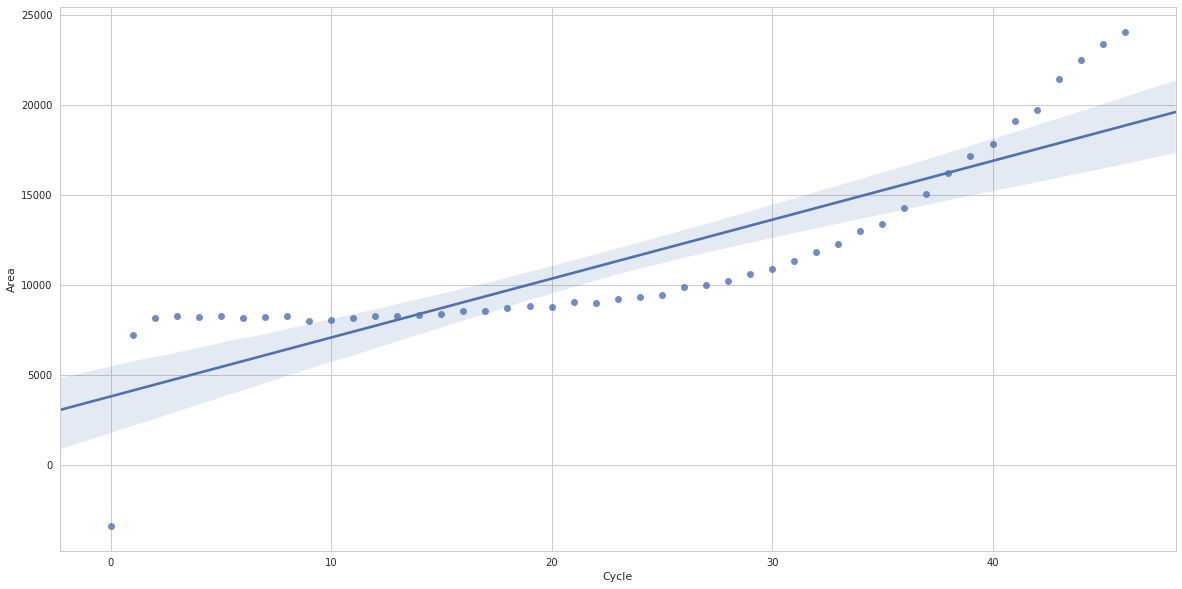

In [163]:
fig, axes = plt.subplots(figsize=(20,10))#; axes.flat[0].set_xlim(0, 550)
areas = np.zeros((df.Cycle.max(),))
for cycle in range(df.Cycle.max()):
    cycle_load = df[df.Cycle==cycle].Load.as_matrix()
    cycle_time = df[df.Cycle==cycle].Time.as_matrix()
    areas[cycle] = np.trapz(cycle_load, cycle_time)
areas_df = pd.DataFrame(areas); areas_df.columns = ['Area']; areas_df = areas_df.reset_index()
sns.regplot('index', 'Area', areas_df)
axes.set(xlabel='Cycle');